### Sentiment Analysis About Climate Change

This document is an analysis of a twitter dataset about general opinions on human-made climate change aquired from kaggle.com

It is consistent of several visualizations of data as bars, piecharts and data frames.

The original of the csv file can be found at https://www.kaggle.com/datasets/edqian/twitter-climate-change-sentiment-dataset

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
twitter_data = pd.read_csv('twitter_sentiment_data.csv')

Controlling the csv file to be sure about columns

In [3]:
twitter_data.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In the sentiment column, each integer represent an opinion about the subject.

* `-1`: Negative
* `0`: Neutral
* `1`: Positive
* `2`: News (Content that links to factual news)

#### Data Preperation

In [4]:
def column_analyzer(dataset, *args):
    """This function gets a pandas dataframe and parse it's desired columns into dictionaries"""
    memo = {}
    
    for column_name in args:    
        for data in dataset[column_name]:        
            if data in memo.keys():
                memo[data] += 1
            else:
                memo[data] = 1
    return memo

Above function groups the classified data in their own classes and assigns them into key-value pairs as seen below

In [5]:
sentiments = column_analyzer(twitter_data, "sentiment")

In the cell below, I assign our dictionary to a numpy array to wrok with matplotlib and pandas more flexibly

In [6]:
sentiment_array = np.array([])


for sent in sentiments:
    sentiment_array = np.append(sentiment_array, 0)
    
for sent in sentiments:
    sentiment_array[sent+1] = sentiments[sent]
    
opinion_array = sentiment_array[0:3]
    
opinion_array

array([ 3990.,  7715., 22962.])

#### Data Visualization

First images is a bar chart which gives us to actual number of tweets, in a classified manner.

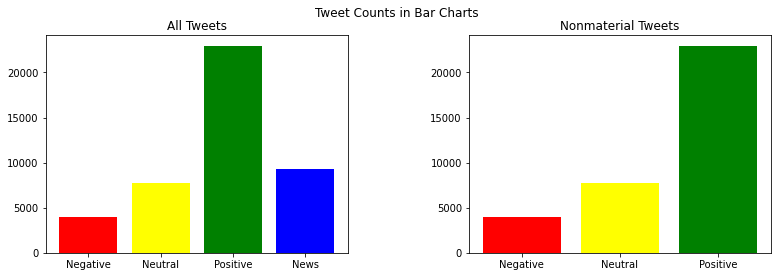

In [7]:
four_labels = ["Negative", "Neutral", "Positive", "News"]
four_colors = ["Red", "Yellow", "Green", "Blue"]

three_labels = ["Negative", "Neutral", "Positive"]
three_colors = ["Red", "Yellow", "Green"]

fig, (ax0, ax1) = plt.subplots(1,2)

fig.set_figwidth(13)

ax0.bar(four_labels, sentiment_array, color = four_colors)
ax0.set_title("All Tweets")

ax1.bar(three_labels, opinion_array, color = three_colors)
ax1.set_title("Nonmaterial Tweets")

plt.suptitle("Tweet Counts in Bar Charts")
plt.subplots_adjust(wspace=0.4)
plt.show()

Second images is a pie chart which gives us an understanding about the distribution of our data in percentages.

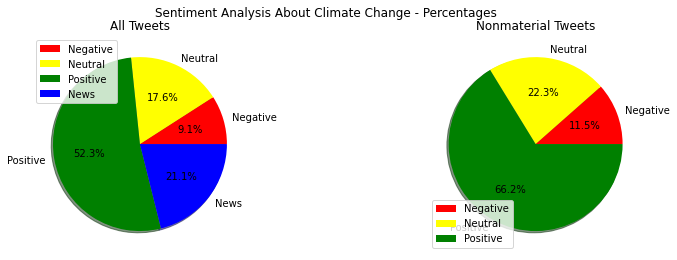

In [8]:
fig1, (ax2, ax3) = plt.subplots(1,2)

fig1.set_figwidth(13)

ax2.pie(sentiment_array,
       labels = four_labels,
       colors = four_colors,
       shadow = True,
       autopct='%1.1f%%')
ax2.legend()
ax2.set_title("All Tweets")

ax3.pie(opinion_array,
       labels = three_labels,
       colors = three_colors,
       shadow = True,
       autopct='%1.1f%%')
ax3.legend()
ax3.set_title("Nonmaterial Tweets")

plt.suptitle("Sentiment Analysis About Climate Change - Percentages")
plt.show()

Third images is a table (a pandas dataframe) which gives us numbers in a written manner.

In [9]:
all_tweets_df = pd.DataFrame(sentiment_array, index = four_labels, columns = ["Tweets"])
all_tweets_df = all_tweets_df.transpose()

opinions_df = pd.DataFrame(opinion_array, index = three_labels, columns = ["Tweets"])
opinions_df = opinions_df.transpose()

In [10]:
all_tweets_df

,Negative,Neutral,Positive,News
Tweets,3990.0,7715.0,22962.0,9276.0


In [11]:
opinions_df

,Negative,Neutral,Positive
Tweets,3990.0,7715.0,22962.0


#### Conclusion

According to this analysis, when we cut out the factual news, we see that a promising 66.2% of the Twitter users believe the human-made climate change is real. And we have only an 11.5% of users who don't believe the climate change, or at least a human-made climate change. This data can be used while deciding commercial strategies for raising awareness about human-made climate change.